# Research Book

#### documenting the steps taken to

1- transform data

2- prep for modelling

3- analysis
- pros
- cons
- tests: 
- - R2, F - Tests, Adjusted R2, AIC, BIC 

4- notes
- Model/ Regression Analysis Tool: 
- Limitations: 
- Test Used and Why:
- Performance of Model:
- Problems encountered (Cons:)
- Pros:
- bias/variance trade off


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [68]:
data = pd.read_csv('data_source/multifactorLMdata-xtnd.csv', parse_dates=True,infer_datetime_format= True)\
         .drop('Unnamed: 0', axis=1)

In [69]:
data.head()

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,...,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
0,2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.550000,0.090136,-0.016852,7.08,...,329.5,431.7,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6
1,2010/05/06,Anglogold Ashanti Ltd,31150.0,0.139982,28743.150000,1079.933674,697.066667,-0.053612,0.044321,6.58,...,239.3,141.3,115.0,0.3,0.0,741.4,188.0,221.0,396.3,816.6
2,2010/08/11,Anglogold Ashanti Ltd,31420.0,-0.026943,31682.016667,1388.464601,864.983333,0.050286,0.008204,6.42,...,381.9,-8.9,-136.0,2.6,0.0,719.6,203.3,306.8,328.0,1003.0
3,2010/11/10,Anglogold Ashanti Ltd,34987.0,0.096771,32142.716667,784.923382,705.033333,-0.060365,0.136024,5.65,...,400.9,138.2,44.3,559.6,0.0,753.0,248.5,412.7,197.5,1056.6
4,2011/02/16,Anglogold Ashanti Ltd,33230.0,-0.007586,32411.016667,1134.366223,629.016667,-0.061601,0.076571,5.53,...,407.9,197.8,40.4,3.1,3.1,779.3,172.3,444.2,97.4,1095.5


In [70]:
debt = pd.read_csv('data_source/SA_Debt.csv', parse_dates=True,infer_datetime_format= True)

In [71]:
debt.head()

,Date,Debt(M),Debt(%GDP),Debt_Per_Capita
0,2017,154899,50.10,NaN
1,2016,152509,51.70,2742.0
2,2015,156650,49.33,2861.0
3,2014,164828,46.96,3057.0
4,2013,161760,44.10,3046.0


In [72]:
# Merge with debt and drop unnecessary columns
df_2 = data.merge(debt, how='left',
                 left_on=data['Date'].apply(lambda x: x[:4]),
                 right_on=debt['Date'].apply(lambda x: str(x)),
                 suffixes=('', '_y')).drop('Date_y', axis=1)

In [74]:
#data + debt
df_2.head(1)

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,...,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act,Debt(M),Debt(%GDP),Debt_Per_Capita
0,2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.55,0.090136,-0.016852,7.08,...,3.9,3.9,732.8,237.2,220.7,454.3,959.6,130020,34.68,2557.0


In [75]:
cpi = pd.read_csv('data_source/SA_CPI.csv', parse_dates=True, infer_datetime_format=True)

In [76]:
cpi.head()

,year,CPI(%)
0,2018,3.835
1,2017,6.492
2,2016,6.943
3,2015,4.079
4,2014,5.880


In [77]:
# Merge with cpi and drop unnecessary columns
df_3 = df_2.merge(cpi, how='left',
                 left_on=df_2['Date'].apply(lambda x: x[:4]),
                 right_on=cpi['year'].apply(lambda x: str(x))).drop('year', axis=1)

In [78]:
# data + debt + cpi
df_3.head(1)

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,...,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act,Debt(M),Debt(%GDP),Debt_Per_Capita,CPI(%)
0,2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.55,0.090136,-0.016852,7.08,...,3.9,732.8,237.2,220.7,454.3,959.6,130020,34.68,2557.0,5.468


In [79]:
gdp = pd.read_csv('data_source/SA_GDP.csv', parse_dates=True, infer_datetime_format=True)

In [80]:
gdp.head()

,Date,GDP_Mill$,GDP_Growth(%)
0,2017,274.183,0.8
1,2016,294.900,0.3
2,2015,317.568,1.3
3,2014,351.116,1.7
4,2013,366.802,2.5


In [81]:
# Merge with gdp and drop unnecessary columns
df_4 = df_3.merge(gdp, how='left',
                 left_on=df_3['Date'].apply(lambda x: x[:4]),
                 right_on=gdp['Date'].apply(lambda x: str(x)),
                 suffixes=('', '_y')).drop('Date_y', axis=1)

In [82]:
# data + debt + cpi + gdp
df_4.head(1)

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,...,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act,Debt(M),Debt(%GDP),Debt_Per_Capita,CPI(%),GDP_Mill$,GDP_Growth(%)
0,2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.55,0.090136,-0.016852,7.08,...,237.2,220.7,454.3,959.6,130020,34.68,2557.0,5.468,375.304,3.0


In [83]:
unemploy = pd.read_csv('data_source/SA_unemployment.csv', parse_dates=True, infer_datetime_format=True)

In [84]:
unemploy.head()

,Date,Unemployment,Unemployment_Change(%),Unemployment_alt
0,2017,27.6,3.27,24.8
1,2016,26.7,5.42,24.9
2,2015,25.4,1.00,25.0
3,2014,25.1,1.52,25.1
4,2013,24.7,-0.60,24.6


In [85]:
# Merge with gdp and drop unnecessary columns
df_5 = df_4.merge(unemploy, how='left',
                 left_on=df_4['Date'].apply(lambda x: x[:4]),
                 right_on=unemploy['Date'].apply(lambda x: str(x)),
                 suffixes=('', '_y')).drop('Date_y', axis=1)

In [86]:
# data + debt + cpi + gdp + unemployment
df_5.head(1)

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,...,net_cash_op_act,Debt(M),Debt(%GDP),Debt_Per_Capita,CPI(%),GDP_Mill$,GDP_Growth(%),Unemployment,Unemployment_Change(%),Unemployment_alt
0,2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.55,0.090136,-0.016852,7.08,...,959.6,130020,34.68,2557.0,5.468,375.304,3.0,24.9,4.96,24.7


---
### Thus far
below are are descriptions of the data thus far

#### Note:
redundant columns need to be removed.

checks for collinearity need to be made

check with colleagues for additional data/features

In [87]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 361
Data columns (total 31 columns):
Date                       362 non-null object
company                    362 non-null object
current_price              362 non-null float64
momentum                   362 non-null float64
moving_average             362 non-null float64
moving_volatility          362 non-null float64
trading_range              362 non-null float64
target_return              362 non-null float64
exp_market_change          362 non-null float64
rates                      362 non-null float64
Revenue                    362 non-null float64
Cost_of_Sales              362 non-null float64
Gross_profit               362 non-null float64
Operating_profit           362 non-null float64
Net_Profit                 362 non-null float64
Issue_of_shares            362 non-null float64
Share_repurchase           362 non-null float64
Non_current_assets         362 non-null float64
Current_assets             362 no

In [88]:
df_5.describe()

,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,Revenue,Cost_of_Sales,...,net_cash_op_act,Debt(M),Debt(%GDP),Debt_Per_Capita,CPI(%),GDP_Mill$,GDP_Growth(%),Unemployment,Unemployment_Change(%),Unemployment_alt
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,3.620000e+02,3.620000e+02,...,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,16974.962707,0.044377,16564.897084,759.215547,428.271938,0.024152,0.019987,5.913066,6.474576e+04,4.183132e+04,...,18368.105707,155498.701657,43.678149,2925.649171,5.465779,360.396334,2.043923,25.210221,1.744309,24.860773
std,21958.572134,0.124124,21123.930998,1087.678001,517.952050,0.126972,0.049025,0.723839,2.467824e+05,1.666338e+05,...,89388.284061,10996.854573,5.644972,194.625747,1.116650,39.507483,0.953041,0.639278,2.264707,0.176162
min,1407.000000,-0.497312,1315.200000,15.429080,18.900000,-0.448740,-0.130974,4.930000,3.400000e+01,1.000000e+00,...,-13213.000000,130020.000000,34.680000,2557.000000,3.571000,294.900000,0.300000,24.700000,-0.600000,24.600000
25%,4794.750000,-0.023584,4642.058333,186.717128,122.650000,-0.048975,-0.015685,5.490000,6.032715e+03,2.462750e+03,...,1004.250000,152509.000000,38.230000,2742.000000,4.079000,317.568000,1.300000,24.800000,-0.300000,24.700000
50%,11550.500000,0.045823,11533.641667,458.309578,308.758333,0.020117,0.025172,5.730000,1.647400e+04,1.046500e+04,...,2318.100000,159429.000000,44.100000,3046.000000,5.858000,366.802000,2.200000,24.900000,1.000000,24.900000
75%,19736.000000,0.108954,19084.329167,978.691231,566.383333,0.094745,0.054444,6.420000,3.932775e+04,2.196400e+04,...,5869.500000,162398.000000,49.330000,3091.000000,6.340000,396.332000,3.000000,25.400000,4.960000,25.000000
max,216500.000000,0.790000,211206.766667,11516.442725,4833.900000,0.540323,0.155542,7.480000,2.299925e+06,1.600878e+06,...,779740.000000,164828.000000,51.700000,3104.000000,6.943000,416.879000,3.300000,26.700000,5.420000,25.100000


In [116]:
df_5.shape

(362, 31)

In [117]:
df_5.columns

Index(['Date', 'company', 'current_price', 'momentum', 'moving_average',
       'moving_volatility', 'trading_range', 'target_return',
       'exp_market_change', 'rates', 'Revenue', 'Cost_of_Sales',
       'Gross_profit', 'Operating_profit', 'Net_Profit', 'Issue_of_shares',
       'Share_repurchase', 'Non_current_assets', 'Current_assets',
       'Non_current_liabilities', 'Current_liabilities', 'net_cash_op_act',
       'Debt(M)', 'Debt(%GDP)', 'Debt_Per_Capita', 'CPI(%)', 'GDP_Mill$',
       'GDP_Growth(%)', 'Unemployment', 'Unemployment_Change(%)',
       'Unemployment_alt'],
      dtype='object')

In [119]:
# column renamed as "$" caused issue in backward elimination
df_5.rename(columns={'GDP_Mill$': 'GDP_Mill_dollars'}, inplace=True)

In [121]:
# columns renamed as "%" caused issues in backward elimination
df_5.rename(columns={'Debt(%GDP)': 'Debt(perc_GDP)', 'CPI(%)':'CPI_perc', 'GDP_Growth(%)':'GDP_Growth_perc', 'Unemployment_Change(%)':'Unemployment_perc_Change'}, inplace=True)

In [123]:
# column renamed as "$" caused issue in backward elimination
df_5.rename(columns={'Debt(perc_GDP)': 'Debt_perc_GDP', 'Debt(M)':'Debt_M'}, inplace=True)

In [124]:
df_5.to_csv('data_source/Data_prepped.csv')

In [56]:
df_5['target_return'].head()

0    0.090136
1   -0.053612
2    0.050286
3   -0.060365
4   -0.061601
Name: target_return, dtype: float64

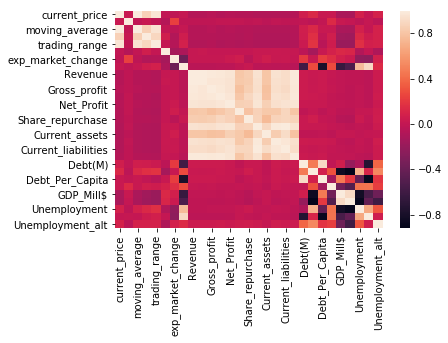

In [54]:
sns.heatmap(df_5.corr())

---
### Train, Test, Split

In [15]:
# import initial data
df = pd.read_csv('data_source/data.csv', parse_dates=True,infer_datetime_format= True)\
         .drop('Unnamed: 0', axis=1)
df.head()

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,...,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
0,2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.550000,0.090136,-0.016852,7.08,...,329.5,431.7,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6
1,2010/05/06,Anglogold Ashanti Ltd,31150.0,0.139982,28743.150000,1079.933674,697.066667,-0.053612,0.044321,6.58,...,239.3,141.3,115.0,0.3,0.0,741.4,188.0,221.0,396.3,816.6
2,2010/08/11,Anglogold Ashanti Ltd,31420.0,-0.026943,31682.016667,1388.464601,864.983333,0.050286,0.008204,6.42,...,381.9,-8.9,-136.0,2.6,0.0,719.6,203.3,306.8,328.0,1003.0
3,2010/11/10,Anglogold Ashanti Ltd,34987.0,0.096771,32142.716667,784.923382,705.033333,-0.060365,0.136024,5.65,...,400.9,138.2,44.3,559.6,0.0,753.0,248.5,412.7,197.5,1056.6
4,2011/02/16,Anglogold Ashanti Ltd,33230.0,-0.007586,32411.016667,1134.366223,629.016667,-0.061601,0.076571,5.53,...,407.9,197.8,40.4,3.1,3.1,779.3,172.3,444.2,97.4,1095.5


In [16]:
# Lables
y = df['target_return']

# Features
X = df.drop(['Date', 'company', 'target_return'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [28]:
X_train.head()

,current_price,momentum,moving_average,moving_volatility,trading_range,exp_market_change,rates,Revenue,Cost_of_Sales,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
157,6641.0,-0.037257,6624.733333,367.970516,166.433333,-0.021447,5.12,2131765.0,1429239.0,702526.0,1755488.0,317491.0,122322.0,62209.00000,47325104.0,3674414.0,19486567.0,27508302.0,779740.0000
161,11754.0,0.075586,11114.933333,329.094127,245.316667,0.056623,6.33,849817.0,564317.0,285500.0,949897.0,197607.0,317310.0,78978.66667,31886832.0,4286751.0,7917385.0,23468811.0,338279.6667
198,4443.0,0.154926,4131.783333,166.161050,181.150000,-0.037809,7.08,5257.0,2768.0,2489.0,294.0,95.0,37.0,4.00000,4476.0,1696.0,2006.0,1369.0,867.0000
9,26245.0,-0.243660,29320.433333,2931.435383,620.783333,-0.032459,5.56,1794.0,989.0,805.0,584.0,563.0,0.0,0.00000,8542.0,2762.0,4580.0,980.0,1758.0000
137,2436.0,0.027848,2305.500000,104.793502,91.383333,0.038987,7.04,4777.0,998.0,3779.0,3626.0,5088.0,544.0,0.00000,112922.0,3400.0,32796.0,9719.0,4077.0000


---
### Lasso Regularization

In [19]:
from sklearn.linear_model import Lasso

In [107]:
lasso = Lasso(alpha=0.0001, normalize=True)

In [108]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
pred = lasso.predict(X_test)

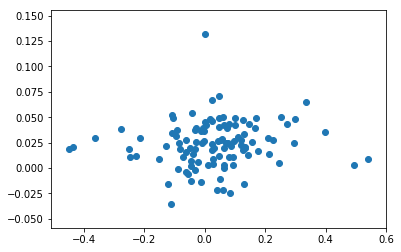

In [110]:
plt.scatter(y_test, pred)

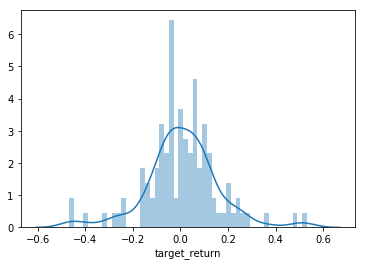

In [111]:
sns.distplot(y_test-pred, bins=50)

In [112]:
mse = np.mean((pred - y_test)**2)
mse

0.024202034727646975

In [113]:
lasso.score(X_test, y_test)

0.003662439761550562

In [114]:
lasso_coef = lasso.coef_
print(lasso_coef)

[ 0.00000000e+00 -3.88260289e-04  0.00000000e+00  8.84415697e-07
  0.00000000e+00 -2.97241738e-01 -3.15607522e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.74165123e-07
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.64259287e-09
  8.44361675e-09  0.00000000e+00 -0.00000000e+00]


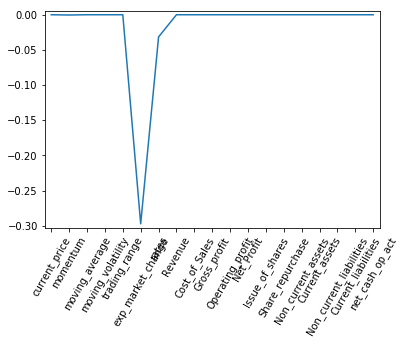

In [115]:
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation=60)
plt.margins(0.02)
plt.show()